**классификатор картинок LeNet на Keras+TensorFlow**

Евгений Борисов <borisov.e@solarl.ru>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation

from tensorflow.keras.datasets import fashion_mnist

---

In [3]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz

In [4]:
# class_names = [ 'T-shirt/top', 
#                 'Trouser', 
#                 'Pullover', 
#                 'Dress', 
#                 'Coat', 
#                 'Sandal', 
#                 'Shirt', 
#                 'Sneaker', 
#                 'Bag', 
#                 'Ankle boot' ]

In [5]:
class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
x_train = train_images/255.0
x_test = test_images/255.0

x_train = x_train[:,:,:,np.newaxis].astype('float32')
x_test = x_test[:,:,:,np.newaxis].astype('float32')

In [9]:
x_train.shape, train_labels.shape, x_test.shape, test_labels.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [10]:
num_classes = len(set(train_labels))
input_shape = x_train.shape[1:]

input_shape, num_classes

((28, 28, 1), 10)

In [11]:
model = Sequential()
# CONV => RELU => POOL
model.add(Convolution2D(10, kernel_size=5, padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
# CONV => RELU => POOL
model.add(Convolution2D(20, kernel_size=5, padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten => RELU layers
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))

# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
%%time

history = model.fit(x_train, train_labels, batch_size=1000, epochs=35,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/35
48000/48000 [==============================] - 6s 131us/step - loss: 1.0769 - acc: 0.6377 - val_loss: 0.7124 - val_acc: 0.7315
Epoch 2/35
48000/48000 [==============================] - 3s 68us/step - loss: 0.6556 - acc: 0.7541 - val_loss: 0.5675 - val_acc: 0.7862
Epoch 3/35
48000/48000 [==============================] - 3s 71us/step - loss: 0.5642 - acc: 0.7903 - val_loss: 0.5415 - val_acc: 0.7951
Epoch 4/35
48000/48000 [==============================] - 3s 68us/step - loss: 0.5074 - acc: 0.8122 - val_loss: 0.5246 - val_acc: 0.8056
Epoch 5/35
48000/48000 [==============================] - 3s 70us/step - loss: 0.4675 - acc: 0.8290 - val_loss: 0.4811 - val_acc: 0.8215
Epoch 6/35
48000/48000 [==============================] - 3s 70us/step - loss: 0.4362 - acc: 0.8427 - val_loss: 0.4321 - val_acc: 0.8442
Epoch 7/35
48000/48000 [==============================] - 3s 70us/step - loss: 0.4138 - acc: 0.8491 - val_loss: 0.4165 - val_ac

---

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [15]:
# import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

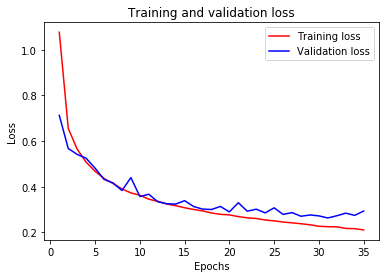

In [16]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

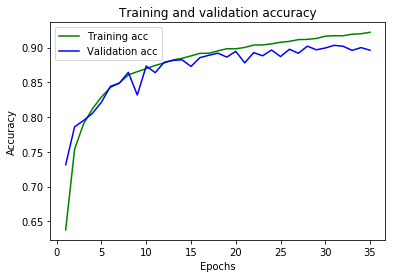

In [17]:
plt.clf()   # clear figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [18]:
test_loss, test_acc = model.evaluate(x_test, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/step
Test accuracy: 0.8856


---

In [19]:
p = model.predict(x_test)
r = np.argmax(p,axis=1)
n=test_images.shape[1]

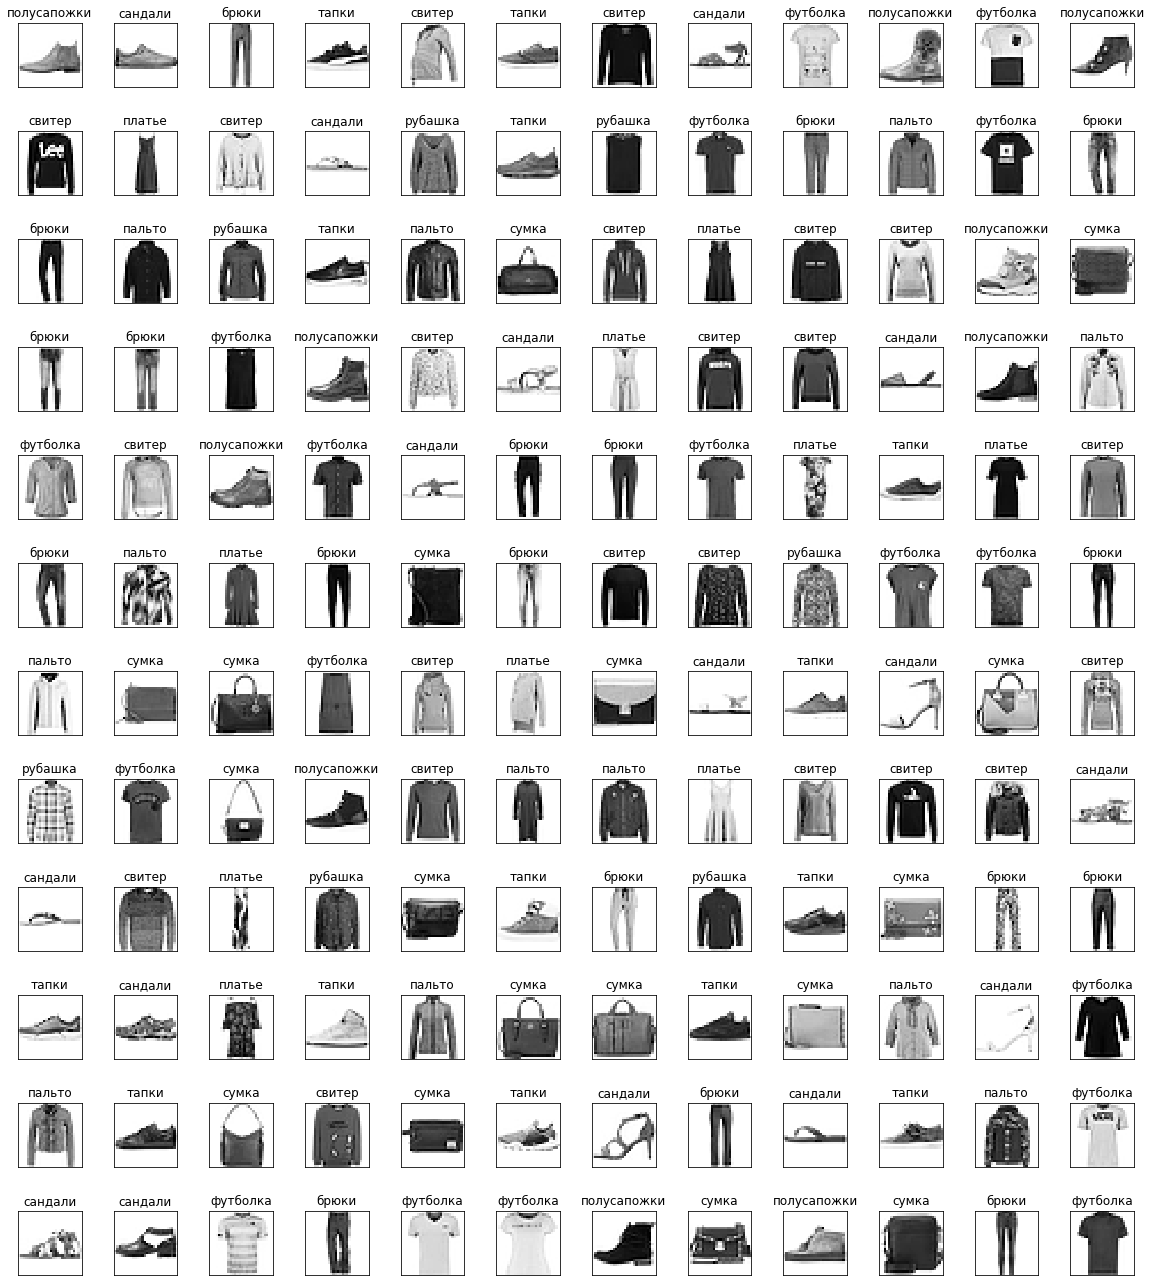

In [20]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].set_title(class_names[r[k]])
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        # axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.plasma)
        axarr[i][j].imshow(test_images[k,:,:],cmap=plt.cm.Greys)
                        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()

---

In [21]:
import tensorflow as tf
from tensorflow.python.client import device_lib

In [22]:
print(tf.__version__)
print(tf.keras.__version__)

1.12.2
2.1.6-tf


In [23]:
print(tf.test.is_built_with_cuda())

True


In [24]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10404398192588557103
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1622323200
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11291718766889304237
physical_device_desc: "device: 0, name: Quadro K620, pci bus id: 0000:01:00.0, compute capability: 5.0"
]
